In [62]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [63]:
load_dotenv('example2.env')

True

In [64]:
#Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [65]:
btc_url="https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url="https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [66]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
eth_response=requests.get(eth_url).json()
eth_price=eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
# YOUR CODE HERE!
my_btc_value=btc_price
my_eth_value=eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $30058.00
The current value of your 5.3 ETH is $1632.34


In [67]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [68]:
#Set alpaca api key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#Create the alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [69]:
 # Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()
#Set the tickers

tickers=["AGG","SPY"]

#Set timeframe to "1Day" for Alpaca API
timeframe="1Day"

#Get current closing prices for SPY and AGG
df_investments = api.get_bars(
    tickers,
    timeframe,
    start=today
).df


#Reorganize the dataframe
#Separate ticker data
SPY=df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
AGG=df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

#Concatenate the ticker dataframes
df_investments = pd.concat((SPY,AGG),axis=1,keys=['AGG','SPY'])

#Preview DataFrame
df_investments.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2020-05-01 04:00:00+00:00  116.87  117.0998  116.6775       24394  116.97   
2020-05-04 04:00:00+00:00  116.97  117.0900  116.8700       15546  116.89   
2020-05-05 04:00:00+00:00  116.88  116.9700  116.8100       15147  116.96   
2020-05-06 04:00:00+00:00  116.41  116.7100  116.3000       20234  116.44   
2020-05-07 04:00:00+00:00  116.77  116.7700  116.4200       15964  116.61   

                                                   SPY                      \
                            volume        vwap   close      high       low   
timestamp                                                                    
2020-05-01 04:00:00+00:00  6331654  116.846992  282.83  290.6572  281.5200   
2020-05-04 04:00:00+00:00  3803239  116.960894  283.59  283.9000  279.1300   
2020-05-05 04:00:00+00:00  5593693  116.879703  286.15  289.2500  283.7134   
2020-05-06 04:00:00+00:00  7832788  116.423669  284.34  288.4600  283.7800   
2020-05-07 04:00:00+00:00  3914327  116.646007  287.70  289.7800  287.1300   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00      639155  285.31  127002350  284.074074  
2020-05-04 04:00:00+00:00      460683  280.74   81813464  281.785875  
2020-05-05 04:00:00+00:00      459766  286.64   80363726  287.388247  
2020-05-06 04:00:00+00:00      436221  288.04   74268760  286.080459  
2020-05-07 04:00:00+00:00      422689  287.75   75995625  287.986917

In [70]:
#Pick AGG and SPY close prices
agg_close_price=float(df_investments['AGG']['close'][0])
spy_close_price=float(df_investments['SPY']['close'][0])
#Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [71]:
#Compute the current value of shares
my_spy_value= spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg
#Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


In [72]:
#Set monthly household income
monthly_income=12000
#Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

#Create savings DataFrame
#YOUR CODE HERE
df_savings=pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])
#Display savings DataFrame
display(df_savings)

,amount
crypto,31690.34
shares,37515.50


<Axes: title={'center': 'Savings'}, ylabel='amount'>

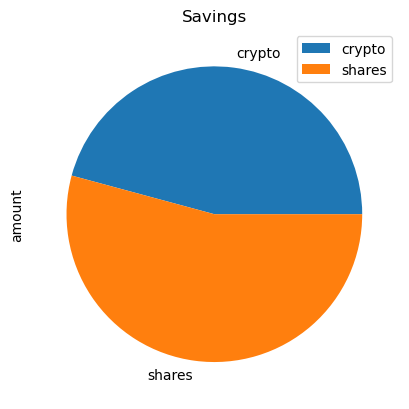

In [73]:
#Plot savings pie chart
df_savings.plot.pie(y='amount',title='Savings')

In [74]:
#Set ideal emergency fund
emergency_fund=monthly_income*3

#Calculate total amount of savings
total_savings=sum(savings_data)
#Validate savings health
if total_savings > emergency_fund:
    print("Congratulations! You have enough for the emergency fund!")
if total_savings == emergency_fund:
    print("Congratulations!You've reached your financial goal!")
if total_savings < emergency_fund:
    print(f"You have ${emergency_fund-total_savings} until you reach your goal.")

Congratulations! You have enough for the emergency fund!


Part 2: Retirement Planning
Monte Carlo simulation

In [75]:
#Set start and end dates of five years back from today
#Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [76]:
# Get 5 years' worth of historical data for SPY and AGG
historical_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
historical_data=pd.concat([historical_data],axis=1)
# Separate ticker data
SPY=historical_data[historical_data['symbol']=='AGG'].drop('symbol', axis=1)
AGG=historical_data[historical_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data=pd.concat((SPY,AGG),axis=1,keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [80]:

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE! 
MC_future_shares = MCSimulation(
    portfolio_data = historical_data,
    num_simulation=1000,
    num_trading_days=252*30
)


IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE! 
future_shares.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
future_shares.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!


In [ ]:
 # Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower=
ci_upper=
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

In [ ]:

# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!


In [ ]:
 # Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE! 

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
initial_investment=10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

In [ ]:

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
 # Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
 # Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")